Skeleton code for 

In [1]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
from mocpy import MOC

In [4]:
df1 = Table.read("dr7_bh_May09_2011.fits", format="fits")
names = [name for name in df1.colnames if len(df1[name].shape) <= 1]
df1 = df1[names].to_pandas()
df1.head()

,SDSS_NAME,RA,DEC,REDSHIFT,PLATE,FIBER,MJD,TARGET_FLAG_TARGET,NSPECOBS,UNIFORM_TARGET,...,Z_HW_ERR,DELTA_G_I,LOGNH,RASS_COUNT_RATE,RASS_OFFSET,MASS_OFFSET,WISE_OFFSET,COMMENT,GALEX_OFFSET,E_BV
0,b'000006.53+003055.2',0.027228,0.515341,1.8246,685,467,52203,34603008,1,0,...,0.003330,0.031951,20.507999,-9.0,0.0,0.000,-1.0,b' ',1.271283,0.025235
1,b'000008.13+001634.6',0.033900,0.276301,1.8373,685,470,52203,1048576,1,0,...,0.002156,0.373997,20.502001,-9.0,0.0,0.013,-1.0,b' ',0.344662,0.031247
2,b'000009.26+151754.5',0.038604,15.298477,1.1985,751,354,52251,1048578,1,1,...,0.000811,0.326355,20.551001,-9.0,0.0,0.000,-1.0,b' ',0.421989,0.043216
3,b'000009.38+135618.4',0.039089,13.938450,2.2342,750,82,52235,2,1,1,...,0.006468,0.338832,20.572001,-9.0,0.0,0.011,-1.0,b' ',0.276151,0.062419
4,b'000009.42-102751.9',0.039271,-10.464426,1.8449,650,199,52143,1048580,1,0,...,0.003253,-0.112428,20.444000,-9.0,0.0,0.000,-1.0,b' ',0.799800,0.036447


In [5]:
#This file the (for example) radio survey for which you want to find detections in
%time m1 = MOC.from_lonlat(df1["RA"].values*u.deg, df1["DEC"].values*u.deg, 6)

CPU times: user 9.09 ms, sys: 2.47 ms, total: 11.6 ms
Wall time: 7.58 ms


In [6]:
df2 = Table.read("LoTSS_DR2_v110_masked.srl.fits", format="fits").to_pandas()
df2.head()

,Source_Name,RA,E_RA,DEC,E_DEC,Peak_flux,E_Peak_flux,Total_flux,E_Total_flux,Maj,...,E_DC_Min,PA,E_PA,DC_PA,E_DC_PA,Isl_rms,S_Code,Mosaic_ID,Number_Pointings,Masked_Fraction
0,b'ILTJ112142.68+465542.0',170.427837,0.526516,46.928355,0.346481,0.699326,0.108029,0.806960,0.207734,7.274897,...,0.788749,103.782025,30.732488,0.000000,30.732488,0.105776,b'S',b'P7Hetdex11',3,0.33
1,b'ILTJ112144.88+471503.6',170.436980,0.340029,47.251026,0.246900,0.724265,0.068374,1.049715,0.153344,7.895910,...,0.580537,88.386845,25.375679,88.386845,25.375679,0.064301,b'S',b'P7Hetdex11',4,0.93
2,b'ILTJ112142.41+465914.9',170.426691,0.638307,46.987490,0.943231,0.480169,0.097797,0.911136,0.268915,10.216657,...,1.175968,27.919156,26.475103,27.919156,26.475103,0.092634,b'S',b'P7Hetdex11',4,0.32
3,b'ILTJ112143.64+472024.4',170.431827,0.449475,47.340116,0.379996,0.389433,0.058863,0.447431,0.112094,6.738551,...,0.888884,81.492747,70.862124,81.492747,70.862124,0.057152,b'S',b'P7Hetdex11',4,0.61
4,b'ILTJ112141.23+470640.0',170.421811,0.596128,47.111121,0.279966,0.376566,0.058286,0.384504,0.105261,7.471818,...,0.619784,81.520311,19.571212,0.000000,19.571212,0.059898,b'S',b'P7Hetdex11',4,0.62


In [7]:
#This file is your big survey (e.g. SDSS) which you want to compute detection fractions for
%time m2 = MOC.from_lonlat(df2["RA"].values*u.deg, df2["DEC"].values*u.deg, 6)

CPU times: user 350 ms, sys: 108 ms, total: 459 ms
Wall time: 298 ms


CPU times: user 25.1 ms, sys: 3.67 ms, total: 28.8 ms
Wall time: 26.6 ms
CPU times: user 22.9 ms, sys: 2.7 ms, total: 25.6 ms
Wall time: 22.8 ms


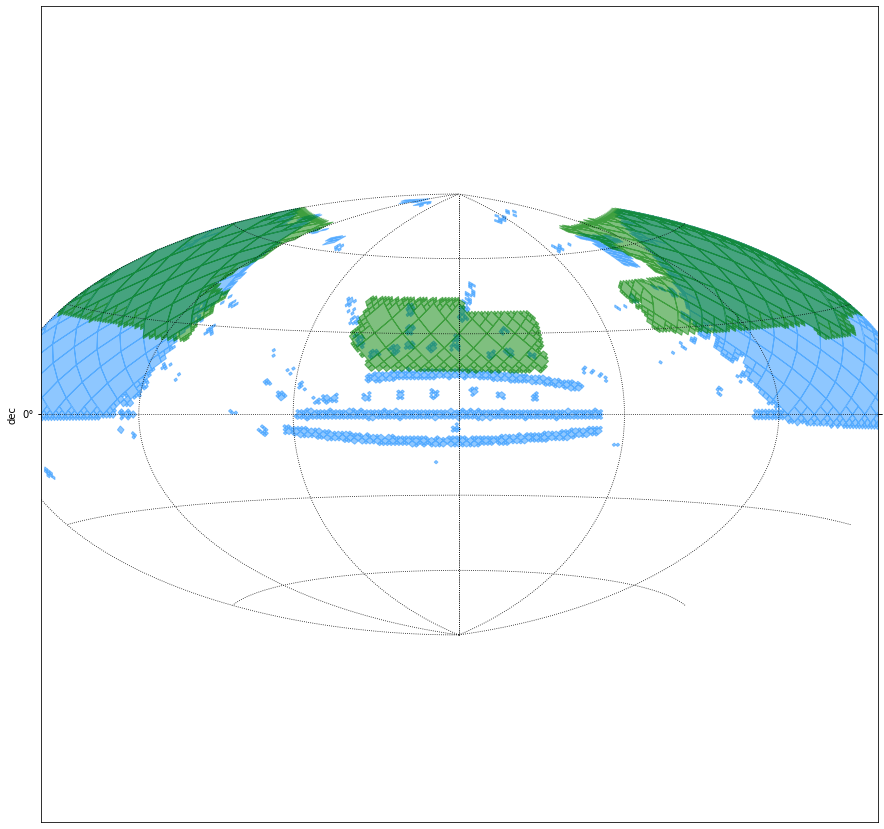

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(111, figsize=(15, 15))

from mocpy import World2ScreenMPL

from astropy.coordinates import Angle
with World2ScreenMPL(fig, 
         fov=300 * u.deg,
         center=SkyCoord(0, 0, unit='deg', frame='icrs'),
         coordsys="icrs",
         rotation=Angle(0, u.degree),
         projection="AIT") as wcs:
    ax = fig.add_subplot(1, 1, 1, projection=wcs)

    %time m1.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="dodgerblue")
    %time m2.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="green")

plt.xlabel('ra')
plt.ylabel('dec')
plt.grid(color="black", linestyle="dotted")

Blue is cooverage of SDSS; green is coverage of LoTSS-DR2.  What we want is the intersection. 

---

CPU times: user 28.2 ms, sys: 3.85 ms, total: 32.1 ms
Wall time: 33.8 ms
CPU times: user 12.9 ms, sys: 1.93 ms, total: 14.8 ms
Wall time: 17.2 ms


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


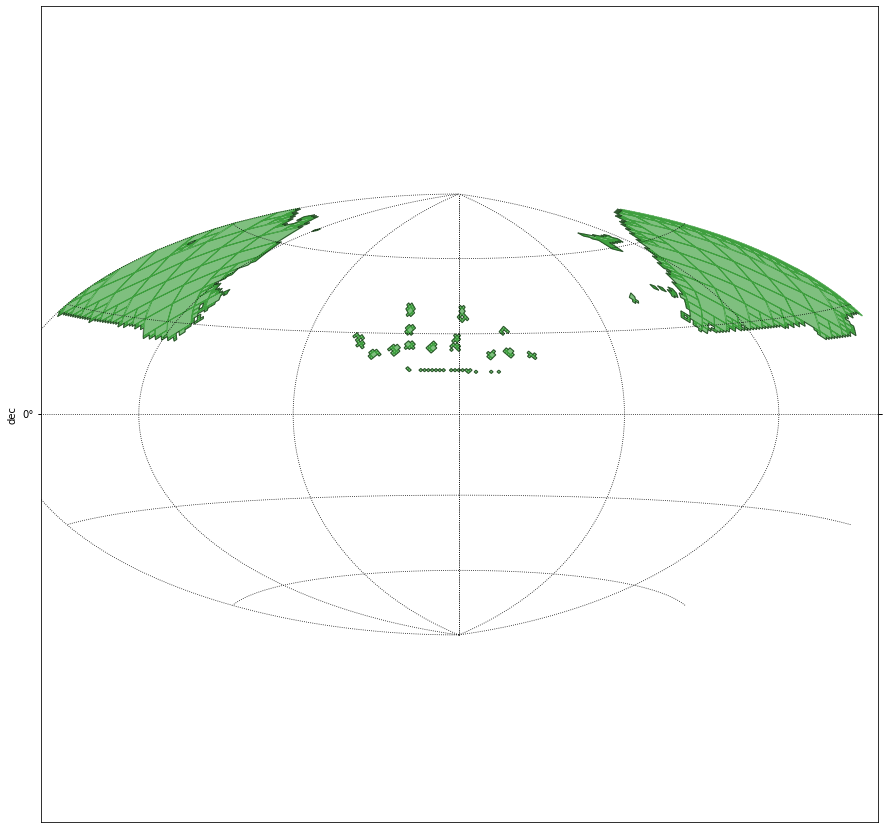

In [9]:
m_intersect = m1.intersection(m2)

import matplotlib.pyplot as plt
fig = plt.figure(111, figsize=(15, 15))

from mocpy import World2ScreenMPL

from astropy.coordinates import Angle
with World2ScreenMPL(fig, 
         fov=300 * u.deg,
         center=SkyCoord(0, 0, unit='deg', frame='icrs'),
         coordsys="icrs",
         rotation=Angle(0, u.degree),
         projection="AIT") as wcs:
    ax = fig.add_subplot(1, 1, 1, projection=wcs)

    %time m_intersect.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="green")
    %time m_intersect.border(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="black")

plt.xlabel('ra')
plt.ylabel('dec')
plt.grid(color="black", linestyle="dotted")

---

Now save the table

In [10]:
#sdss = MOC.from_lonlat(df1["RA"].values*u.deg, df1["DEC"].values*u.deg, 6)
lotss= MOC.from_lonlat(df2["RA"].values*u.deg, df2["DEC"].values*u.deg, 6)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
indices = lotss.contains(df1["RA"].values*u.deg, df1["DEC"].values*u.deg)

In [12]:
indices.shape

(105783,)

In [13]:
filtered_table = df1[indices]

In [14]:
filtered_table.shape

(47845, 153)

In [15]:
filtered_table

,SDSS_NAME,RA,DEC,REDSHIFT,PLATE,FIBER,MJD,TARGET_FLAG_TARGET,NSPECOBS,UNIFORM_TARGET,...,Z_HW_ERR,DELTA_G_I,LOGNH,RASS_COUNT_RATE,RASS_OFFSET,MASS_OFFSET,WISE_OFFSET,COMMENT,GALEX_OFFSET,E_BV
16,b'000024.83+245703.3',0.103459,24.950935,3.2137,2822,315,54389,0,1,0,...,0.003094,-0.299352,20.677000,-9.0,0.0,0.015,-1.0,b' ',-1.000000,0.076722
17,b'000025.21+291609.2',0.105059,29.269232,0.9243,2824,393,54452,34603008,1,0,...,0.000938,-0.032920,20.702000,-9.0,0.0,0.000,-1.0,b' ',-1.000000,0.059212
18,b'000025.93+242417.5',0.108071,24.404882,1.1560,2822,318,54389,0,1,0,...,0.001692,0.274597,20.679001,-9.0,0.0,0.000,-1.0,b' ',0.561672,0.085096
32,b'000045.77+255106.1',0.190716,25.851721,1.4446,2822,339,54389,33554432,1,0,...,0.001670,0.427698,20.681999,-9.0,0.0,0.000,-1.0,b' ',0.134366,0.043338
51,b'000104.92+160101.2',0.270512,16.017014,0.4530,750,576,52235,2,1,1,...,0.000513,0.388920,20.542000,-9.0,0.0,0.000,-1.0,b' ',0.274485,0.037027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105681,b'235734.06+352720.7',359.391907,35.455769,2.7273,1881,6,53261,0,1,0,...,0.003106,0.040702,20.850000,-9.0,0.0,0.000,-1.0,b' ',-1.000000,0.085706
105687,b'235739.89+361103.1',359.416229,36.184216,3.1276,1881,69,53261,0,1,0,...,0.003691,0.443076,20.879000,-9.0,0.0,0.000,-1.0,b' ',-1.000000,0.125214
105688,b'235740.31+370635.3',359.417999,37.109814,0.8331,1881,586,53261,0,1,0,...,0.000851,0.498394,20.905001,-9.0,0.0,0.014,-1.0,b' ',1.469211,0.111430
105716,b'235829.71+361600.8',359.623810,36.266911,2.3749,1881,34,53261,0,1,0,...,0.001824,0.262851,20.879999,-9.0,0.0,0.000,-1.0,b' ',-1.000000,0.139924


In [16]:
def plot(moc, title=''):
    from matplotlib import path, patches
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(15, 10))
    from mocpy import World2ScreenMPL
    with World2ScreenMPL(fig, 
                         fov=300 * u.deg,
                         center=SkyCoord(0, 0, unit='deg', frame='icrs'),
                         coordsys="icrs",
                         rotation=Angle(0, u.degree),
                          projection="AIT") as wcs:
        ax = fig.add_subplot(1, 1, 1, projection=wcs)

        moc.fill(ax=ax, wcs=wcs, edgecolor='r', facecolor='r', linewidth=1.0, fill=True, alpha=0.5)
        moc.border(ax=ax, wcs=wcs, color="black", alpha=0.5)
    
    plt.xlabel('ra')
    plt.ylabel('dec')
    if title:
        plt.title(title)
    plt.grid(color="black", linestyle="dotted")
    plt.show()
    plt.close()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


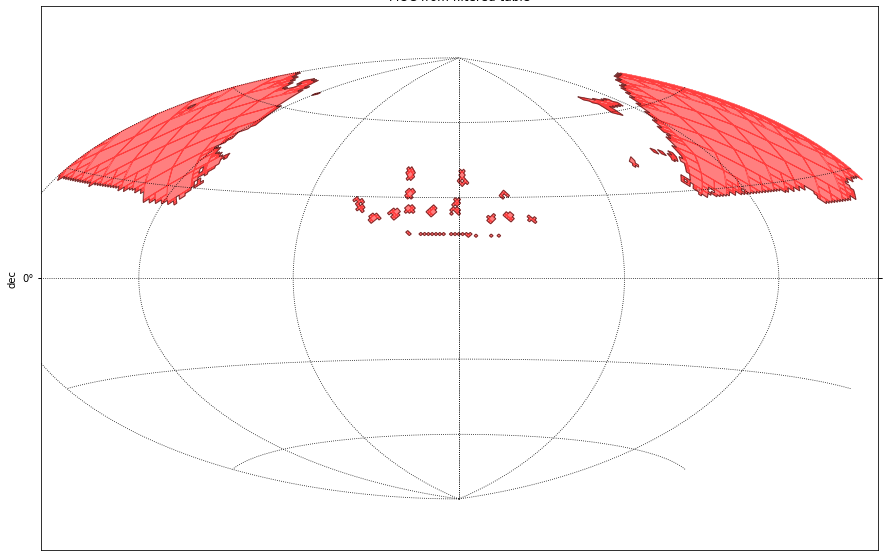

In [17]:
moc_final = MOC.from_lonlat(filtered_table['RA'].values*u.deg, filtered_table['DEC'].values*u.deg, 6)
plot(moc=moc_final, title="MOC from filtered table")

In [19]:
filtered_table.shape

(47845, 153)

So DR2 really is a big upgrade!  Compare to ~43000 from DR1.  Should do again with DR7 for Amy's sample.  Could also re-match the parent sample of 8403 color-selected sources from Richards+2021.